# Data Analysis and Visualisation
## 1. Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.fftpack import fft
from scipy import signal

import import_ipynb
from util import *

importing Jupyter notebook from util.ipynb


## 2. Global Parameters

In [2]:
# Global Configuration Dictionary for Plot Customisation
# use pylab.rcParams.update(params) to update settings
params = {'lines.linewidth' : 1,
          'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

# Default mappings
df_column_mapping = {
    'x' : 3,
    'y' : 4,
    'z' : 5
}
axis_listing = ['x', 'y', 'z']

# Frequency presets
fs = 512 # sampling frequency
cutoff = 10 # cut-off frequency

## 3. Data Wrangling and Analysis

### 3.1 Data Import 

In [3]:
# ======================================================================
# Edit the input variable below to change to the folder path of interest
# ======================================================================
working_path = get_folder_path("Handgrip")

# File and directory management
os.chdir(working_path)
directory = os.listdir()
file = 'hgrip-lvl0-try3-forearm_Metawear_2019-11-10T16.34.00.327_C5013CAC38C1_Accelerometer_1.4.5.csv'
df = read_csv_file(file)
df.head()

os.chdir('..')

### 3.2 Handgrip Gesture - Lvl 0 - Accelerometer - Data Analysis

In [4]:
df.head()

,epoch (ms),time (-00:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
0,1573403640327,2019-11-10T16:34:00.327,0.000,0.882,0.083,-0.465
1,1573403640346,2019-11-10T16:34:00.346,0.019,0.881,0.084,-0.474
2,1573403640366,2019-11-10T16:34:00.366,0.039,0.879,0.085,-0.473
3,1573403640387,2019-11-10T16:34:00.387,0.060,0.888,0.085,-0.468
4,1573403640406,2019-11-10T16:34:00.406,0.079,0.889,0.083,-0.467


In [5]:
df.describe()

,epoch (ms),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
count,5.362000e+03,5362.000000,5362.000000,5362.000000,5362.000000
mean,1.573404e+12,53.824843,0.791729,0.011932,-0.617560
std,3.108507e+04,31.085073,0.107982,0.100833,0.120569
min,1.573404e+12,0.000000,0.091000,-0.450000,-1.070000
25%,1.573404e+12,26.912250,0.722000,-0.064000,-0.716750
50%,1.573404e+12,53.825000,0.779000,0.014000,-0.658000
75%,1.573404e+12,80.738000,0.885000,0.083000,-0.473000
max,1.573404e+12,107.651000,1.430000,0.347000,-0.192000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5362 entries, 0 to 5361
Data columns (total 6 columns):
epoch (ms)       5362 non-null int64
time (-00:00)    5362 non-null object
elapsed (s)      5362 non-null float64
x-axis (g)       5362 non-null float64
y-axis (g)       5362 non-null float64
z-axis (g)       5362 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 251.5+ KB


In [7]:
df.columns

Index(['epoch (ms)', 'time (-00:00)', 'elapsed (s)', 'x-axis (g)',
       'y-axis (g)', 'z-axis (g)'],
      dtype='object')

### 3.3 Dataframe Extraction

In [8]:
x_axis_data = df['x-axis (g)']
y_axis_data = df['y-axis (g)']
z_axis_data = df['z-axis (g)']
elapsed_time_data = df['elapsed (s)']
df_selected_time = df.loc[df['elapsed (s)'].between(50, 90)]
# df = df[df['closing_price'].between(99, 101)]
# PM10_conc_below_16 = PM10_Data.loc[PM10_Data['Value'] < 16]

#### 3.3.1 Filtered Accelerometer Data (between 50 - 90 seconds)

In [9]:
df_selected_time.head()

,epoch (ms),time (-00:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
2491,1573403690347,2019-11-10T16:34:50.347,50.020,0.727,-0.001,-0.727
2492,1573403690367,2019-11-10T16:34:50.367,50.040,0.730,0.002,-0.722
2493,1573403690388,2019-11-10T16:34:50.388,50.061,0.732,0.002,-0.722
2494,1573403690407,2019-11-10T16:34:50.407,50.080,0.734,0.001,-0.727
2495,1573403690427,2019-11-10T16:34:50.427,50.100,0.720,0.000,-0.723


In [10]:
df_selected_time.describe()

,epoch (ms),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
count,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000
mean,1.573404e+12,70.009752,0.759597,-0.081083,-0.676163
std,1.154996e+04,11.549959,0.133941,0.084568,0.079527
min,1.573404e+12,50.020000,0.091000,-0.450000,-1.070000
25%,1.573404e+12,60.015000,0.701000,-0.126000,-0.723000
50%,1.573404e+12,70.010500,0.749000,-0.087000,-0.682000
75%,1.573404e+12,80.004250,0.814000,-0.038750,-0.642000
max,1.573404e+12,90.000000,1.430000,0.347000,-0.192000


#### 3.3.2 Frequency domain of filtered data

In [11]:
# Create mapping lists
select_cols=[3, 4, 5]
labels=['x','y','z']

lgth, num_signal=df_selected_time.shape
fqy = np.zeros([lgth, num_signal])

# Perform FFT on data and store in matrix
for idx, col in enumerate(select_cols): 
    fqy[:,idx] = np.abs(fft(df_selected_time.iloc[:, col]))

index = np.arange(int(lgth/2))/(int(lgth/2)/(fs/2))

fqy_x = fqy[0:int(lgth/2),0]
fqy_y = fqy[0:int(lgth/2),1]
fqy_z = fqy[0:int(lgth/2),2]

df_freq = pd.DataFrame({'x-axis (g)' : fqy_x, 'y-axis (g)' : fqy_y, 'z-axis (g)' : fqy_z})

In [12]:
df_freq.head()

,x-axis (g),y-axis (g),z-axis (g)
0,1513.118000,161.518000,1346.917000
1,17.835369,14.484714,22.443652
2,12.356992,11.609626,15.654120
3,7.837437,16.695389,11.265441
4,6.672021,12.296432,7.827269


### Accelerometer Data in the Frequency Domain - Statistical Analysis

In [13]:
df_freq.describe()

,x-axis (g),y-axis (g),z-axis (g)
count,996.000000,996.000000,996.000000
mean,6.412787,3.188662,4.253260
std,47.912518,5.503144,42.635574
min,0.116334,0.165740,0.033125
25%,2.213495,1.558438,1.503476
50%,4.164289,2.542731,2.456586
75%,6.811962,3.887709,3.850439
max,1513.118000,161.518000,1346.917000


### 3.4 Data Visualisation of Filtered Data

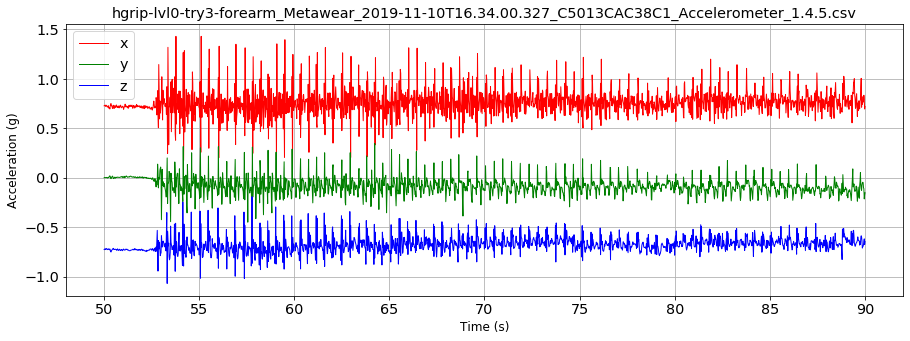

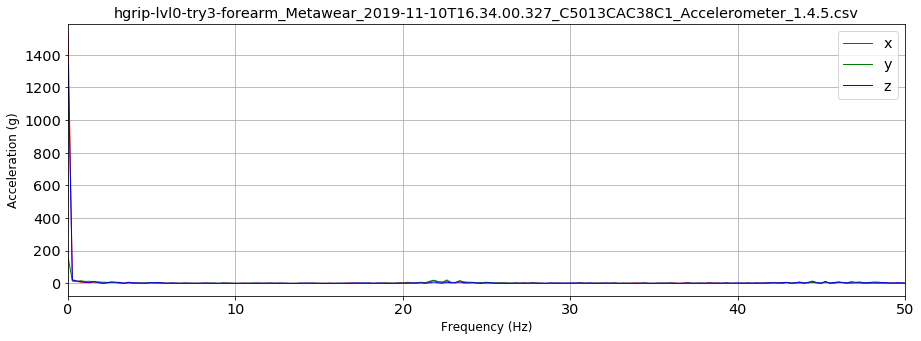

In [14]:
pylab.rcParams.update(params)
plot_time_3_axes(df_selected_time, t = file)
plot_frequency(df_selected_time, fs, t = file)

## 4. Data Visualisation

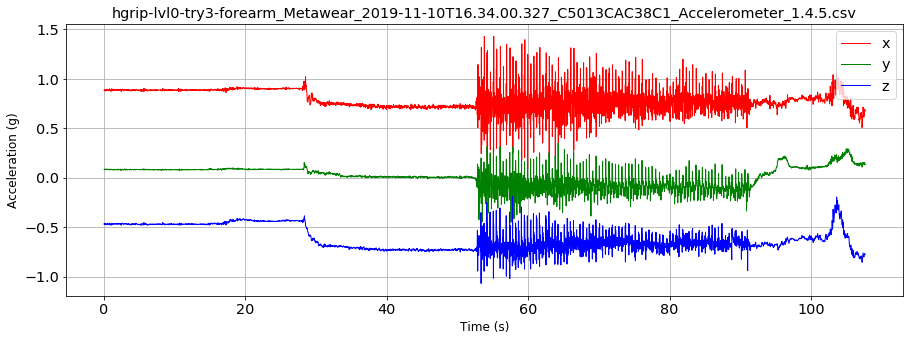

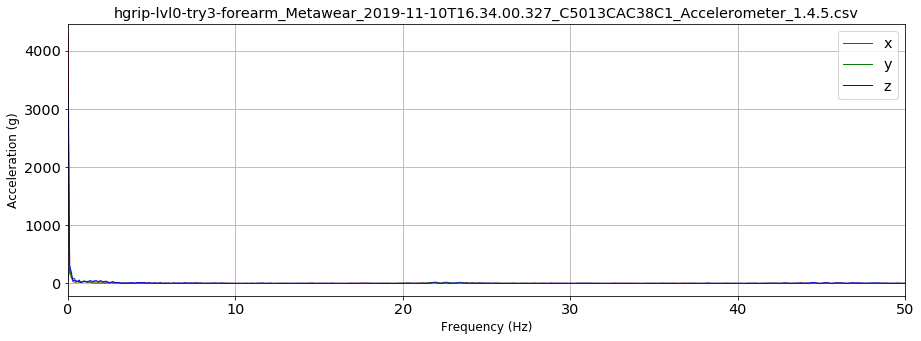

In [15]:
plot_time_3_axes(df, t = file)
plot_frequency(df, fs, t = file)

In [16]:
# # ======================================================================
# # Edit the input variable below to change to the folder path of interest
# # ======================================================================
# working_path = get_folder_path("Handgrip")

# # File and directory management
# os.chdir(working_path)
# directory = os.listdir()

# for file in directory:
#     df = read_csv_file(file)
    
#     if df is None:
#         continue
    
#     # Update plot customisation parameters
#     pylab.rcParams.update(params)

#     # ==============================================
#     # Default Plots
#     # ==============================================
#     # plot_in_3d(df, t = file)
#     plot_time_3_axes(df, t = file)
#     plot_frequency(df, fs, t = file)

#     # Uncomment sections below to enable plots of interest
#     """
#     # ==============================================
#     # Filtered Signals - Data Pre-processing
#     # ==============================================
#     median_data=median_filter(df, 155)
#     lpf_data=freq_filter(df, 155, cutoff/fs)
#     comb_data=freq_filter_recursive(median_data, 155, cutoff/fs)
#     """

#     """
#     # ==============================================
#     # Low Pass Filter Plots
#     # ==============================================
#     plot_time_3_axes(lpf_data, t = "LPF: " + file)
#     plot_frequency_recursive(lpf_data, fs, t = "LPF: " + file)
#     """
    
#     """
#     # ==============================================
#     # Median Pass Filter Plots
#     # ==============================================
#     plot_time_3_axes(median_data, t = "Median Filter: " + file)
#     plot_frequency_recursive(median_data, fs, t = "Median Filter: " + file)
#     """

#     """
#     # ==============================================
#     # Combined (Low + Median) Pass Filter Plots
#     # ==============================================
#     plot_time_3_axes(comb_data, t = "Combined Filter: " + file)
#     plot_frequency_recursive(comb_data, fs, t = "Combined Filter: " + file)
#     """
#     """
#     # ==============================================
#     # Integrated Signals Plots
#     # ==============================================
#     integrated_data = acc_integration(df)
#     plot_time_3_axes(integrated_data, t = "Integrated Signal (Velocity): " + file)
#     """
    
# os.chdir('..')